<a href="https://colab.research.google.com/github/Kwangbin/data_01/blob/master/keras_basic_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!git clone https://github.com/Kwangbin/keras_basic.git

Cloning into 'keras_basic'...


In [ ]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#검증셋 만들기
#60000개 자료중 뒤에 10000만 가져오기
x_val = x_train[50000:60000]
y_val = y_train[50000:60000]
#  즉 60000개의 데이터를 50000개 10000개로 분리 
x_train =  x_train[0:50000]
y_train = y_train[0:50000]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
# 벡터 10개 activation function'softmax'
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기  
#hist = model.fit(x_train, y_train, epochs=5, batch_size=32)
#검증 모델시
hist = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val,y_val))

# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# ## evaluation loss and_metrics ##
# [0.229540154337883, 0.9330999851226807]  93% 성능

# 7. 모델 사용하기
# 첫번째 샘플 예측
xhat = x_test[0:1]
yhat = model.predict(xhat)
#출력되는 yhat의 합은 1이다
print('## yhat ##')
print(yhat)
# 최종 출력값중 가장 높은 수치가 학습값이다. 즉 역서는 8번째값 즉 7이다

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1563/1563 [==============================] - 17s 2ms/step - loss: 1.1497 - accuracy: 0.6933 - val_loss: 0.3728 - val_accuracy: 0.9013
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3916 - accuracy: 0.8931 - val_loss: 0.3081 - val_accuracy: 0.9157
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3274 - accuracy: 0.9084 - val_loss: 0.2748 - val_accuracy: 0.9234
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2890 - accuracy: 0.9190 - val_loss: 0.2524 - val_accuracy: 0.9285
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2675 - accuracy: 0.9247 - val_loss: 0.2366 - val_accuracy: 0.9346
## training loss and acc ##
[0.7301682233810425, 0.36758336424827576, 0.3155580163002014, 0.2854297161102295, 0.263497531414032]
[0.8180199861526489, 0.8996400237083435, 0.9124400019645691, 0.9197400212287903, 0.9254999

#다중 퍼셉트로 만들기
## pima 구글 검색으로 찾아 다운로드
## pima indian diabetes csv 
##파일 업로드 사용


In [ ]:
#다중 퍼셉트로 실습
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# 랜덤시드 고정시키기
np.random.seed(5)

# 1. 데이터 준비하기
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# 2. 데이터셋 생성하기
x_train = dataset[:700,0:8]
y_train = dataset[:700,8]
x_test = dataset[700:,0:8]
y_test = dataset[700:,8]

# 3. 모델 구성하기
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=1500, batch_size=64)

# 6. 모델 평가하기
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 결과 76% 최고는 80% 까지 나온다
# 결과는 계속 바뀜

Epoch 1/1500
11/11 [==============================] - 1s 2ms/step - loss: 3.5079 - accuracy: 0.4416
Epoch 2/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.8130 - accuracy: 0.5437
Epoch 3/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.5571 - accuracy: 0.5753
Epoch 4/1500
11/11 [==============================] - 0s 1ms/step - loss: 1.4040 - accuracy: 0.5907
Epoch 5/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.2217 - accuracy: 0.6089
Epoch 6/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.1821 - accuracy: 0.6024
Epoch 7/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.0648 - accuracy: 0.6144
Epoch 8/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.0649 - accuracy: 0.6058
Epoch 9/1500
11/11 [==============================] - 0s 2ms/step - loss: 1.0293 - accuracy: 0.6257
Epoch 10/1500
11/11 [==============================] - 0s 3ms/step - loss: 0.9577 - accuracy: 0.6239

구글 드라이드연결

In [2]:
ls

drive/  sample_data/


In [3]:
cd drive/MyDrive/ml/kagle_basic/

/content/drive/MyDrive/ml/kagle_basic


In [4]:
ls

pima-indians-diabetes.csv


In [5]:
#다중 퍼셉트로 실습
#검증셋 추가
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# 랜덤시드 고정시키기
np.random.seed(5)

# 1. 데이터 준비하기
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# 2. 데이터셋 생성하기
x_train = dataset[:700,0:8]
y_train = dataset[:700,8]
#검증셋
x_val= dataset[600:700,0:8]
y_val= dataset[600:700,8]

x_test = dataset[700:,0:8]
y_test = dataset[700:,8]


# 3. 모델 구성하기
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=1500, batch_size=64, validation_data=(x_val, y_val) )

# 6. 모델 평가하기
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# val_loss 가 떨어지는 시점이 오버피팅이 일어나는 구간이다

Epoch 1/1500
11/11 [==============================] - 14s 50ms/step - loss: 2.9216 - accuracy: 0.6668 - val_loss: 2.2535 - val_accuracy: 0.5800
Epoch 2/1500
11/11 [==============================] - 0s 3ms/step - loss: 2.4124 - accuracy: 0.6072 - val_loss: 1.8530 - val_accuracy: 0.6300
Epoch 3/1500
11/11 [==============================] - 0s 3ms/step - loss: 1.7063 - accuracy: 0.6848 - val_loss: 1.6488 - val_accuracy: 0.6200
Epoch 4/1500
11/11 [==============================] - 0s 5ms/step - loss: 1.6228 - accuracy: 0.6629 - val_loss: 1.4913 - val_accuracy: 0.6200
Epoch 5/1500
11/11 [==============================] - 0s 3ms/step - loss: 1.4988 - accuracy: 0.6373 - val_loss: 1.3718 - val_accuracy: 0.6500
Epoch 6/1500
11/11 [==============================] - 0s 3ms/step - loss: 1.4370 - accuracy: 0.6512 - val_loss: 1.2827 - val_accuracy: 0.6500
Epoch 7/1500
11/11 [==============================] - 0s 3ms/step - loss: 1.2617 - accuracy: 0.6685 - val_loss: 1.2156 - val_accuracy: 0.6400
Epoc

In [ ]:
# 오버피팅을 이용해 최적화 단계 찾기
# epochs 값을 늘려 준다

# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#검증셋 만들기
#60000개 자료중 뒤에 10000만 가져오기
x_val = x_train[50000:60000]
y_val = y_train[50000:60000]
#  즉 60000개의 데이터를 50000개 10000개로 분리 
x_train =  x_train[0:50000]
y_train = y_train[0:50000]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
# 벡터 10개 activation function'softmax'
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기  
#hist = model.fit(x_train, y_train, epochs=5, batch_size=32)
#검증 모델시
hist = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val,y_val))

# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# ## evaluation loss and_metrics ##
# [0.229540154337883, 0.9330999851226807]  93% 성능

# 7. 모델 사용하기
# 첫번째 샘플 예측
xhat = x_test[0:1]
yhat = model.predict(xhat)
#출력되는 yhat의 합은 1이다
print('## yhat ##')
print(yhat)
# 최종 출력값중 가장 높은 수치가 학습값이다. 즉 역서는 8번째값 즉 7이다

Epoch 1/1000
70/70 [==============================] - 1s 5ms/step - loss: 2.3203 - accuracy: 0.1030 - val_loss: 2.2940 - val_accuracy: 0.1033
Epoch 2/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2892 - accuracy: 0.1089 - val_loss: 2.2552 - val_accuracy: 0.1567
Epoch 3/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2443 - accuracy: 0.1529 - val_loss: 2.2159 - val_accuracy: 0.1567
Epoch 4/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2274 - accuracy: 0.1664 - val_loss: 2.1873 - val_accuracy: 0.1467
Epoch 5/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.1872 - accuracy: 0.1703 - val_loss: 2.1593 - val_accuracy: 0.1667
Epoch 6/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.1634 - accuracy: 0.1673 - val_loss: 2.1374 - val_accuracy: 0.1800
Epoch 7/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.1444 - accuracy: 0.1692 - val_loss: 2.1173 - val_accuracy: 0.1833
Epoch 

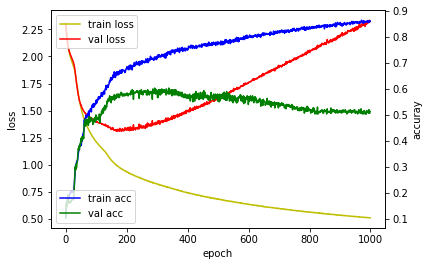

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
#아마존에서 데이터를 받음
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
#x => 784byte = 28 * 28
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 총 70,000개 중 X 60,0000, Y 10,0000
#reshape(샘플수, 한샘플이 가지는 바이트수) =(50,000개 샘플, 784바이트크기)
# 70,000개중  X_train 50000개, X_val 10000개, X_test 10000개
# astype('float32') / 255.0  실수형태로 나누고 256으로 나누면 0-255가  0-1로 바뀜

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
# .to_categorical(Y_train) => 1 hot incoding 
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

# history['acc'] 가 아니라 ['accuracy'] 수정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
#아마존에서 데이터를 받음
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
#x => 784byte = 28 * 28
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 총 70,000개 중 X 60,0000, Y 10,0000
#reshape(샘플수, 한샘플이 가지는 바이트수) =(50,000개 샘플, 784바이트크기)
# 70,000개중  X_train 50000개, X_val 10000개, X_test 10000개
# astype('float32') / 255.0  실수형태로 나누고 256으로 나누면 0-255가  0-1로 바뀜

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
# .to_categorical(Y_train) => 1 hot incoding 
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

# history['acc'] 가 아니라 ['accuracy'] 수정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()